# Predict Life Satisfaction given the GDP as input

### Load essential scientific libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read the CSV file directly from the github
- You can also download and store it locally
- The important thing is to provide appropriate CSV file path

In [3]:
import requests
# Disable SSL certificate verification
response = requests.get('https://example.com', verify=False)
df_lifeSat = pd.read_csv("https://raw.githubusercontent.com/ageron/data/main/lifesat/lifesat.csv")

/opt/homebrew/lib/python3.12/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'example.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [4]:
df_lifeSat.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


In [5]:
df_lifeSat

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6
5,Portugal,32181.154537,5.4
6,Poland,32238.157259,6.1
7,Estonia,35638.421351,5.7
8,Spain,36215.447591,6.3
9,Slovenia,36547.738956,5.9


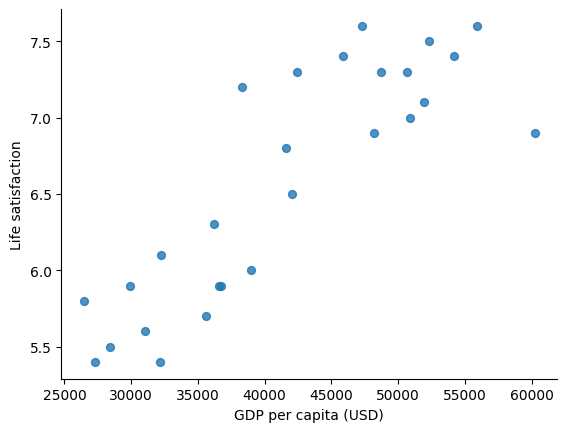

In [6]:
# @title GDP per capita (USD) vs Life satisfaction

from matplotlib import pyplot as plt
df_lifeSat.plot(kind='scatter', x='GDP per capita (USD)', y='Life satisfaction', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
df_lifeSat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               27 non-null     object 
 1   GDP per capita (USD)  27 non-null     float64
 2   Life satisfaction     27 non-null     float64
dtypes: float64(2), object(1)
memory usage: 780.0+ bytes


In [8]:
df_lifeSat.describe()

,GDP per capita (USD),Life satisfaction
count,27.000000,27.000000
mean,41564.521771,6.566667
std,9631.452319,0.765607
min,26456.387938,5.400000
25%,33938.289305,5.900000
50%,41627.129269,6.800000
75%,49690.580269,7.300000
max,60235.728492,7.600000


### Visualizing the relationship between GDP and Life Satisfaction

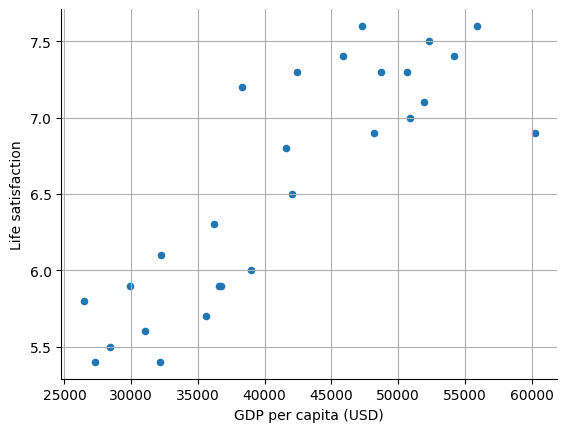

In [9]:
df_lifeSat.plot(kind='scatter', x='GDP per capita (USD)', y = 'Life satisfaction')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.grid(True)
plt.show()

### Storing the relevant columns under X and y
- X is for the input
- y is for the output

In [10]:
X = df_lifeSat[['GDP per capita (USD)']]
y = df_lifeSat[['Life satisfaction']]

In [11]:
print(X)
print(type(X))

    GDP per capita (USD)
0           26456.387938
1           27287.083401
2           28384.987785
3           29932.493910
4           31007.768407
5           32181.154537
6           32238.157259
7           35638.421351
8           36215.447591
9           36547.738956
10          36732.034744
11          38341.307570
12          38992.148381
13          41627.129269
14          42025.617373
15          42404.393738
16          45856.625626
17          47260.800458
18          48210.033111
19          48697.837028
20          50683.323510
21          50922.358023
22          51935.603862
23          52279.728851
24          54209.563836
25          55938.212809
26          60235.728492
<class 'pandas.core.frame.DataFrame'>


In [12]:
print(y)
print(type(y))

    Life satisfaction
0                 5.8
1                 5.4
2                 5.5
3                 5.9
4                 5.6
5                 5.4
6                 6.1
7                 5.7
8                 6.3
9                 5.9
10                5.9
11                7.2
12                6.0
13                6.8
14                6.5
15                7.3
16                7.4
17                7.6
18                6.9
19                7.3
20                7.3
21                7.0
22                7.1
23                7.5
24                7.4
25                7.6
26                6.9
<class 'pandas.core.frame.DataFrame'>


### Import Scikit Learn library
- Split the dataset
- Linear Regression Model

In [13]:
# Split it into 80% training and 20% testing
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

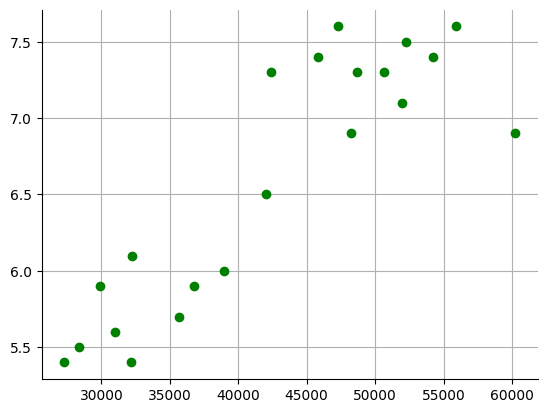

In [14]:
plt.plot(X_train, y_train, 'go')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.grid(True)
plt.show()

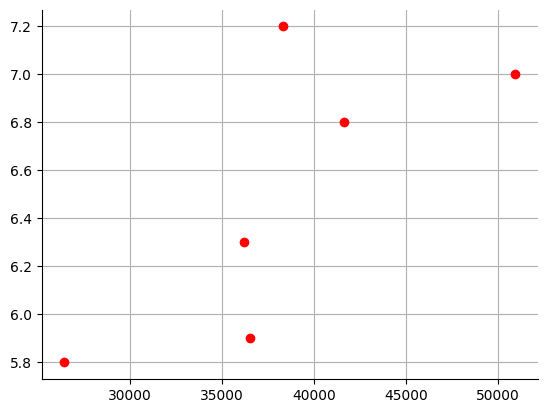

In [15]:
plt.plot(X_test, y_test, 'ro')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.grid(True)
plt.show()

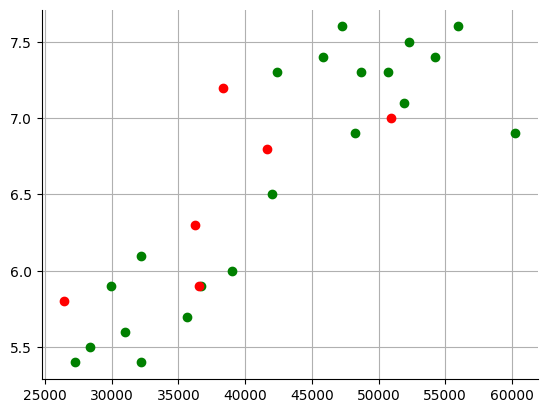

In [16]:
plt.plot(X_train, y_train, 'go')
plt.plot(X_test, y_test, 'ro')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.grid(True)
plt.show()

###Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

###Train the model

In [18]:
model.fit(X_train, y_train)

LinearRegression()

### Looking at the model parameters
- Intercept
- Coefficient

In [19]:
print(model.intercept_)

[3.53271081]


In [20]:
print(model.coef_)

[[7.18650304e-05]]


### Data created to plot the line
- x1
- y1

In [21]:
x1 = np.linspace(25000, 60000, 20)

In [22]:
# y = c + mx

y1 = model.intercept_ + model.coef_[0]*x1

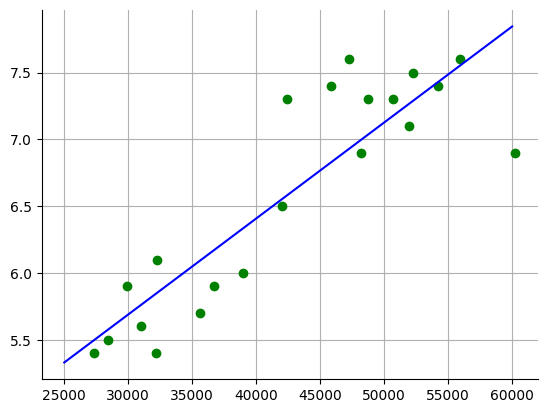

In [23]:
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.plot(X_train, y_train, 'go')
plt.plot(x1, y1, c='b')

plt.grid(True)
plt.show()

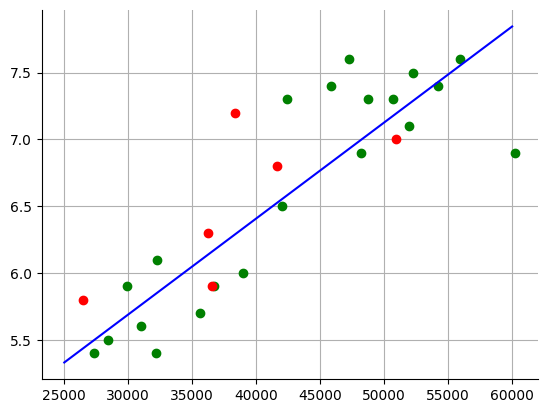

In [24]:
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.plot(X_train, y_train, 'go')
plt.plot(X_test, y_test, 'ro')
plt.plot(x1, y1, c='b')

plt.grid(True)
plt.show()

### Make `predictions` using the model

In [25]:
model.predict([[80000]])

/opt/homebrew/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[9.28191324]])

In [26]:
X_train.shape

(21, 1)

In [28]:
predictions = model.predict(X_test.iloc[:10])
for i in range(6):
    print("Predicted: ", predictions[i])
    print("Actual", y_test.iloc[i])

Predicted:  [6.13533505]
Actual Life satisfaction    6.3
Name: 8, dtype: float64
Predicted:  [6.52424572]
Actual Life satisfaction    6.8
Name: 13, dtype: float64
Predicted:  [6.15921518]
Actual Life satisfaction    5.9
Name: 9, dtype: float64
Predicted:  [7.19224761]
Actual Life satisfaction    7.0
Name: 21, dtype: float64
Predicted:  [5.43399993]
Actual Life satisfaction    5.8
Name: 0, dtype: float64
Predicted:  [6.28811004]
Actual Life satisfaction    7.2
Name: 11, dtype: float64


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train, y_train, cv = 10)
print(cv_scores)
print(cv_scores.mean())
print(cv_scores.std())

[  0.3195733    0.99352482 -15.71239395   0.64818745   0.86593212
 -12.33064722   0.           0.8488109    0.48944712   0.77030426]
-2.3107261202531078
5.91051811293663
